<a href="https://colab.research.google.com/github/srijaanreddyk/Srijan_MetaSciforTraining/blob/main/MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

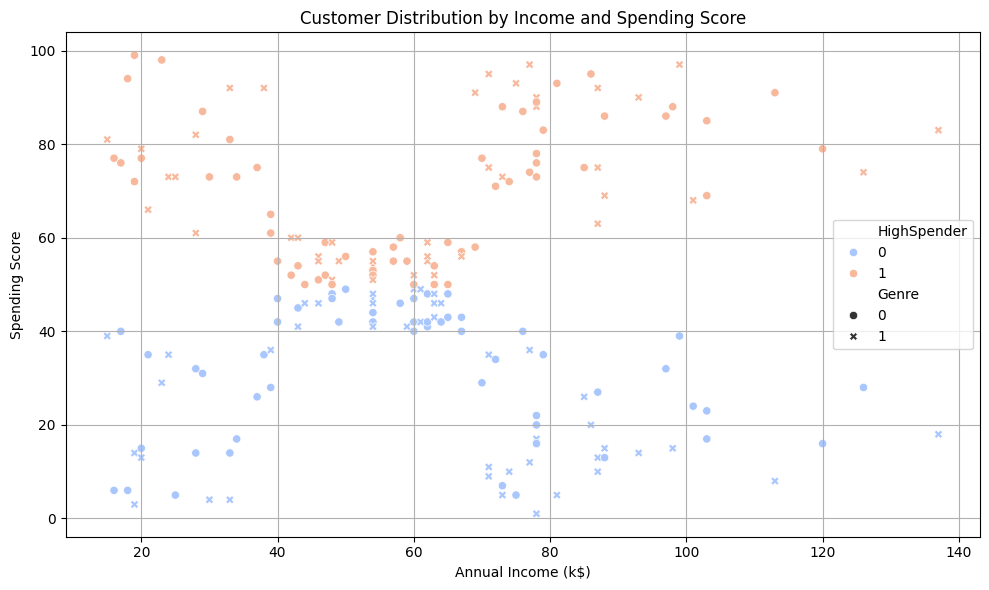


Naive Bayes Results:
Accuracy: 0.675
Confusion Matrix:
 [[12  8]
 [ 5 15]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.60      0.65        20
           1       0.65      0.75      0.70        20

    accuracy                           0.68        40
   macro avg       0.68      0.68      0.67        40
weighted avg       0.68      0.68      0.67        40


Logistic Regression Results:
Accuracy: 0.675
Confusion Matrix:
 [[12  8]
 [ 5 15]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.60      0.65        20
           1       0.65      0.75      0.70        20

    accuracy                           0.68        40
   macro avg       0.68      0.68      0.67        40
weighted avg       0.68      0.68      0.67        40


Gradient Boosting Results:
Accuracy: 0.65
Confusion Matrix:
 [[13  7]
 [ 7 13]]
Classification Report:
               precision    recall

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
df=pd.read_csv("Mall_Customers.csv")
df=df.drop(columns=["CustomerID"])
le=LabelEncoder()
df["Genre"]=le.fit_transform(df["Genre"])
df['HighSpender'] = df['Spending_Score'].apply(lambda x: 1 if x >= 50 else 0)
X=df[["Genre","Age","Annual_Income_(k$)"]]
y=df["HighSpender"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Annual_Income_(k$)", y="Spending_Score", hue="HighSpender", style="Genre", palette="coolwarm")
plt.title("Customer Distribution by Income and Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.grid(True)
plt.tight_layout()
plt.show()
models={
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}
for name,model in models.items():
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(f"\n{name} Results:")
  print("Accuracy:", accuracy_score(y_test, y_pred))
  print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
  print("Classification Report:\n", classification_report(y_test, y_pred))


Saving spam.csv to spam (1).csv


<ipython-input-2-b0f86f4aec94>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Category', palette='viridis')


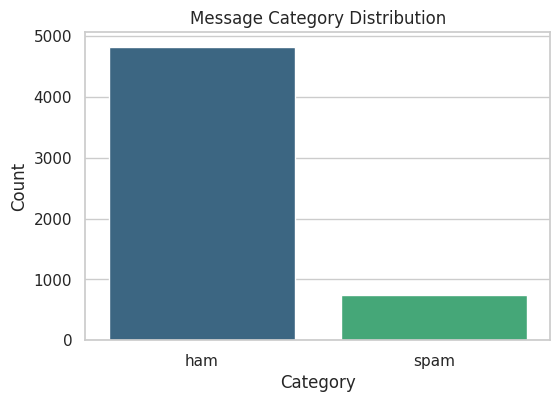


Naive Bayes Classification Report:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       966
        spam       1.00      0.83      0.91       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115


Decision Tree Classification Report:
              precision    recall  f1-score   support

         ham       0.98      0.99      0.98       966
        spam       0.93      0.87      0.90       149

    accuracy                           0.97      1115
   macro avg       0.95      0.93      0.94      1115
weighted avg       0.97      0.97      0.97      1115


Logistic Regression Classification Report:
              precision    recall  f1-score   support

         ham       0.95      1.00      0.98       966
        spam       1.00      0.67      0.80       149

    accuracy                           0.96      1115
   macro a

In [2]:


from google.colab import files
uploaded = files.upload()


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report


df = pd.read_csv(next(iter(uploaded)), encoding='latin-1')
df = df[['Category', 'Message']]


sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Category', palette='viridis')
plt.title("Message Category Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Category'])


tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(df['Message'])
y = df['Label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


models = {
    "Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}


for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Saving weight-height.csv to weight-height.csv


<ipython-input-3-d97746e767a7>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='pastel')


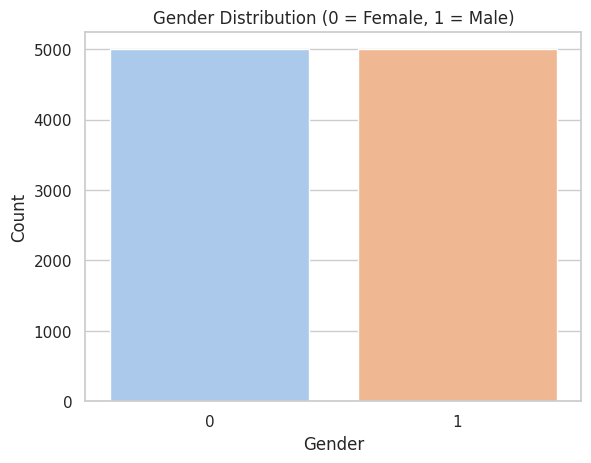


Naive Bayes Classification Report:
              precision    recall  f1-score   support

      Female       0.90      0.88      0.89       988
        Male       0.89      0.90      0.89      1012

    accuracy                           0.89      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.89      0.89      0.89      2000


Decision Tree Classification Report:
              precision    recall  f1-score   support

      Female       0.88      0.86      0.87       988
        Male       0.87      0.89      0.88      1012

    accuracy                           0.88      2000
   macro avg       0.88      0.87      0.87      2000
weighted avg       0.88      0.88      0.87      2000


Logistic Regression Classification Report:
              precision    recall  f1-score   support

      Female       0.93      0.91      0.92       988
        Male       0.92      0.94      0.93      1012

    accuracy                           0.92      2000
   macro a

<ipython-input-3-d97746e767a7>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="viridis")


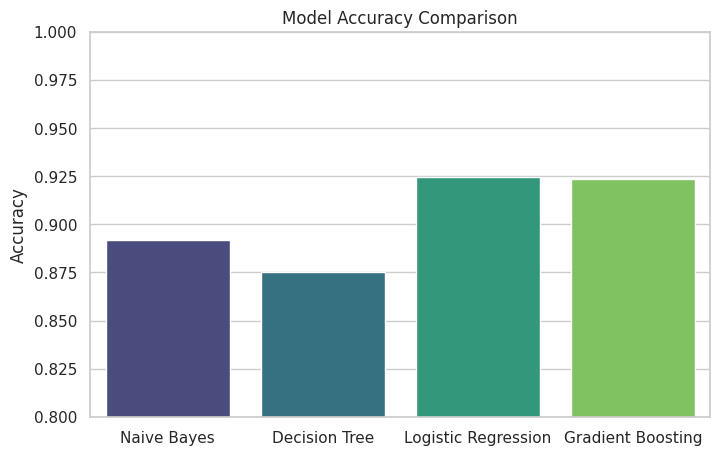

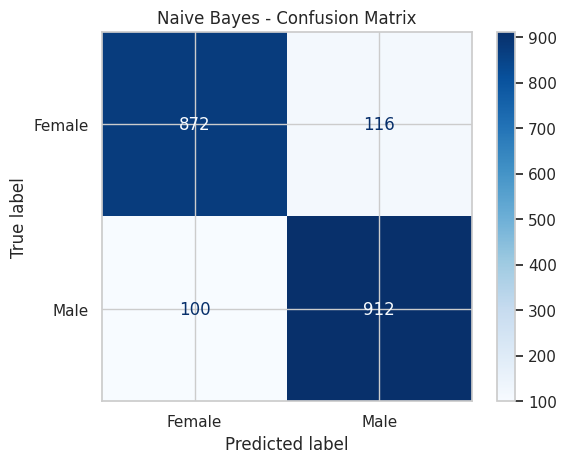

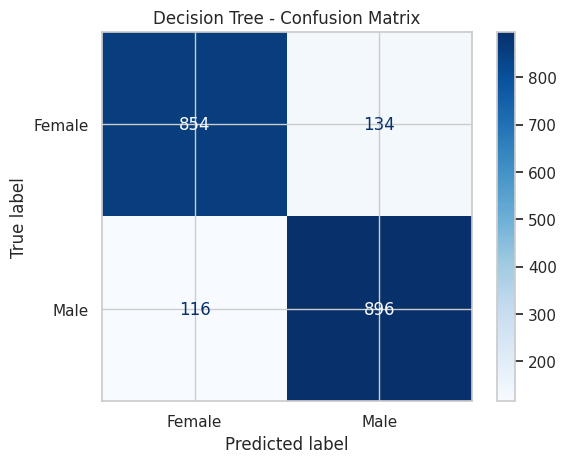

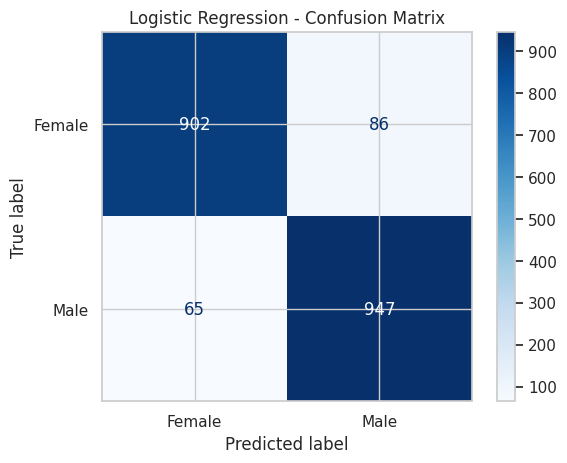

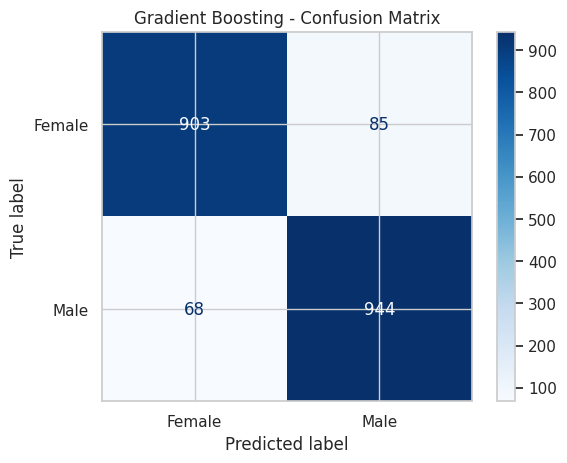

In [3]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

df = pd.read_csv(next(iter(uploaded)))
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

sns.countplot(data=df, x='Gender', palette='pastel')
plt.title("Gender Distribution (0 = Female, 1 = Male)")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

X = df[['Height', 'Weight']]
y = df['Gender']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

models = {
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['Female', 'Male']))

plt.figure(figsize=(8, 5))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="viridis")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0.8, 1.0)
plt.show()

for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Female', 'Male'])
    disp.plot(cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()
